<h1 style="text-align: center;">Лабораторная работа №1</h1>
<h2 style="text-align: center;">Ряды Фурье</h2>

<p style="text-align: center;">Предмет: Частотные методы</p>
<p style="text-align: center;"><i>Выполнил: Шарапов Иван Дмитриевич группа R3237</i></p>
<p style="text-align: center;">Лектор: Алексей Алексеевич Перегудин</p>
<p style="text-align: center;">Практик: Егор Витальевич Догадин</p>


## Карта отчета
1. [О чем лаба?](#paragraph0)
2. [Задание 1](#paragraph1)

## О чем лаба? <a id="paragraph0"></a>

Полагаю, судя из названия ясно что речь идет о рядах Фурье... по ходу выполнения лабы будем разбираться что же от нас просят

## Задание 1 <a id="paragraph1"></a>

В данном задании мы выбираем значения для переменных $$a, \  b,\ t_0, \ t_1, \ t_2,$$ удовлетворяющие условиям:
$$
\begin{gather}
(a, \ b > 0) \\
t_2 > t_1 > t_0 > 0
\end{gather}
$$

Возьмем вот эти значения, полагаю очевидно, что они условиям удовлетворяют:
$$a = 2.0, \ b = 3.5, \ t_0 = 0.7, \ t_1 = 1.2, \ t_2 = 2.7.$$

Нужно задать периодическую функцию (квадратную волну) с периодом 
$$
T = t_2 - t_0
$$
так, чтобы:
$$
f(t) = 
\begin{cases}
a, & t \in [t_0, t_1) \\
b, & t \in [t_1, t_2)
\end{cases}
$$
и далее функция повторяется с периодом \(T\).

Получаем

$$
f(t) = 
\begin{cases}
2.0, & t \in [0.7, 1.2) \\
3.5, & t \in [1.2, 2.7)
\end{cases}
$$

Используя выбранные ранее значения получаем период 
$$T = t_2 - t_0 = 2.7 - 0.7 = 2.0$$

Ниже представлен код, который задаёт эту функцию и строит её график на интервале, скажем, от t = 0 до t = 10. 


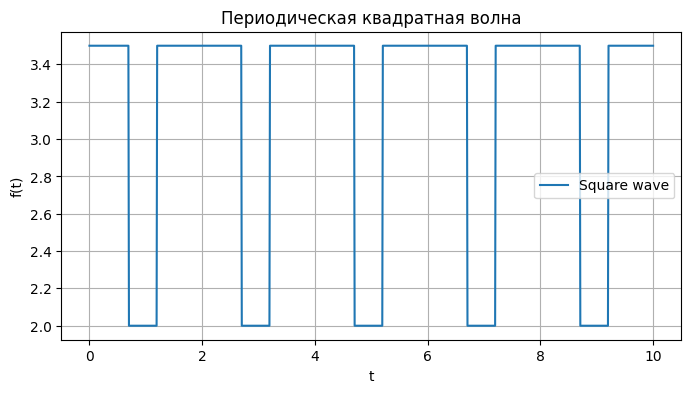

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
a = 2.0
b = 3.5
t0 = 0.7
t1 = 1.2
t2 = 2.7

T = t2 - t0  # Период

# Определяем квадратную волну как периодическую функцию
def square_wave(t):
    # Сдвигаем t на t0 и берём по модулю T
    x_mod = (t - t0) % T
    # Если x_mod < (t1 - t0), возвращаем a, иначе b
    if x_mod < (t1 - t0):
        return a
    else:
        return b

# Векторизуем функцию для работы с массивами
square_wave_vec = np.vectorize(square_wave)

# Задаём массив точек времени для построения графика
t_values = np.linspace(0, 10, 1000)
f_values = square_wave_vec(t_values)

# Построение графика
plt.figure(figsize=(8, 4))
plt.plot(t_values, f_values, label="Square wave")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Периодическая квадратная волна")
plt.grid(True)
plt.legend()
plt.show()


Вот такой вот красивый график нашей квадратной волны получился. Теперь будем рассчитывать частичные суммы рядов Фурье.

В ряде Фурье коэффициенты определяются следующими формулами:

1. Коэффициент среднего значения (постоянная составляющая):
$$
a_0 = \frac{2}{T} \int_{t_0}^{t_2} f(t)\,dt,
$$
где $T = t_2 - t_0$.

2. Коэффициенты $a_n$ (для $n \ge 1$):
$$
a_n = \frac{2}{T} \int_{t_0}^{t_2} f(t)\cos\left(\frac{2\pi n}{T}t\right)\,dt.
$$

3. Коэффициенты $b_n$ (для $n \ge 1$):
$$
b_n = \frac{2}{T} \int_{t_0}^{t_2} f(t)\sin\left(\frac{2\pi n}{T}t\right)\,dt.
$$

4. Комплексные коэффициенты $c_n$:
$$
c_n = \frac{1}{T} \int_{t_0}^{t_2} f(t)e^{-i\frac{2\pi n}{T}t}\,dt.
$$


А вот так выглядят формулы для рядов фурье:
$$
F_N(t) = \frac{a_0}{2} + \sum_{n=1}^N \left( a_n \cos(\omega_n t) + b_n \sin(\omega_n t) \right)
$$

$$
G_N(t) = \sum_{n=-N}^N c_n e^{i\omega_n t}
$$

где $a_n, \ b_n, \ c_n \ $ это наши коэффициенты, которые мы считаем по формулам выше, а $\omega_n = \frac{2 \pi n}{T}$ (в формулах коэффициентов сразу заменил омегу на то, чему она равна)

Теперь начинаем считать наши коэффициенты. так как наша функция кусочная, то разобьем интервал по которому будем интегрировать $f(t)$:

$$a_0 = \frac{2}{2} \left( \int_{0.7}^{1.2} 2\,dt + \int_{1.2}^{2.7} 3.5\,dt \right) = \frac{2}{2} \left( 2 \cdot 0.5 + 3.5 \cdot 1.5 \right) = \frac{25}{4} = 6.25 \quad \boxed{a_0 = \frac{25}{4} = 6.25}$$

$$
\begin{gathered}
a_1 = \frac{2}{2} \left( \int_{0.7}^{1.2} 2 \cos\left(\frac{2\pi}{2} t\right)\,dt + \int_{1.2}^{2.7} 3.5\cos\left(\frac{2\pi}{2} t\right)\,dt \right) = \\
= \left( \int_{0.7}^{1.2} 2 \cos\left(\pi t\right)\,dt + \int_{1.2}^{2.7} 3.5\cos\left(\pi t\right)\,dt \right) = \left( \frac{2\sin(\pi t)}{\pi} \bigg|_{0.7}^{1.2} + \frac{2\sin(\pi t)}{\pi} \bigg|_{1.2}^{2.7} \right) = \frac{2\cos(\frac{19\pi}{20})\cdot \sqrt{2}}{\pi} - \frac{7\cos(\frac{19\pi}{20})\cdot \sqrt{2}}{2\pi} \\
\boxed{a_1 = -\frac{3\cos(\frac{19\pi}{20})\cdot\sqrt{2}}{2\pi} \approx 0.666924}
\end{gathered}
$$

Далее не буду уходить в крайности и писать очевидные вещи по-типу $\frac{2}{2}$ (в формуле коэффициента в первом множителе $\ 2 \ $ сокращается с $\ T=2\ $) и другие несокращенные дроби:

$$
\begin{gathered}
a_2 = \int_{0.7}^{1.2} 2 \cos\left(2\pi t\right)\,dt + \int_{1.2}^{2.7} 3.5\cos\left(2\pi t\right)\,dt = \\
= \frac{\sin(2\pi t)}{\pi}\bigg|_{0.7}^{1.2} + \frac{7\sin(2\pi t)}{4\pi}\bigg|_{1.2}^{2.7} = \\
= -\frac{2\cos(\frac{9\pi}{10})}{\pi} + \frac{7\cos(\frac{9\pi}{10})}{2\pi} \\
\boxed{a_2 = \frac{3\cos(\frac{9\pi}{10})}{2\pi} \approx -0.454096}
\end{gathered}
$$